Chapter 09

# 高斯朴素贝叶斯分类
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

In [2]:
# import the iris data
iris = datasets.load_iris()

# Only use the first two features: sepal length, sepal width
X = iris.data[:, 0:2]
y = iris.target

In [3]:
# generate mesh
h = .02  # step size in the mesh
x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))

In [4]:
# Create color maps
rgb = [[255, 238, 255],  # red
       [219, 238, 244],  # blue
       [228, 228, 228]]  # black
rgb = np.array(rgb)/255.

cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0], [0, 153, 255],[138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

In [5]:
# GaussianNB implements the Gaussian Naive Bayes algorithm
gnb = GaussianNB()

In [6]:
# Fit the data
gnb.fit(X, y)

GaussianNB()

In [7]:
# query points
q = np.c_[xx1.ravel(), xx2.ravel()];

In [8]:
# Predict; query points are the meshgrid points
y_predict = gnb.predict(q)

In [9]:
# Put the result into a color plot
y_predict = y_predict.reshape(xx1.shape)

C:\Users\james\anaconda3\lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


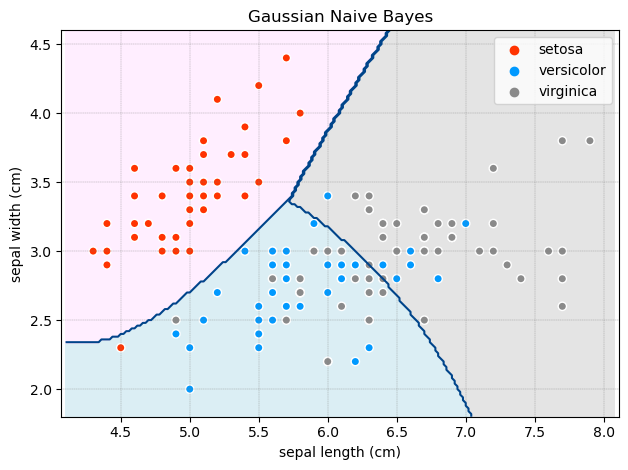

In [10]:
# visualization
fig, ax = plt.subplots()

# plot decision regions
plt.contourf(xx1, xx2, y_predict, cmap=cmap_light)

# plot decision boundaries
plt.contour(xx1, xx2, y_predict, levels=[0,1,2], colors=np.array([0, 68, 138])/255.)

# Plot data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, 
                linewidth = 1, edgecolor=[1,1,1])

# Figure decorations
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("Gaussian Naive Bayes")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
plt.tight_layout()
plt.axis('equal')
plt.show()